<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/GM_corn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [3]:
gm_crops = pd.read_csv('/content/GM crops %.csv')

In [33]:
corn = pd.read_csv('/content/final corn data csv.csv')

In [83]:
gdp_agri = pd.read_csv('/content/real gdp by state agriculture csv.csv')

In [6]:
gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13.00
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7.00
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23.00
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25.00
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8.00


In [ ]:
#gm_crops=gm_crops.drop(columns='Table')

In [9]:
gm_crops["Value"].replace({".": "0"}, inplace=True)
gm_crops["Value"].replace({"*": "0"}, inplace=True)

In [10]:
gm_crops.dtypes

Unit         object
Variety      object
Year          int64
Attribute    object
Value        object
dtype: object

In [13]:
gm_crops["Value"] = gm_crops["Value"].astype(float).astype(int)

In [14]:
gm_crops.dtypes

Unit         object
Variety      object
Year          int64
Attribute    object
Value         int64
dtype: object

In [34]:
corn.head()

,Year,State,Unnamed: 2,Area planted,Area harvested for grain,Yield,Production
0,2005,Alabama,NaN,220,200,119,23800
1,2005,Arizona,NaN,50,22,195,4290
2,2005,Arkansas,NaN,240,230,131,30130
3,2005,California,NaN,560,130,172,22360
4,2005,Colorado,NaN,1100,950,148,140600


In [35]:
corn=corn.drop(columns='Unnamed: 2')

In [36]:
corn.dtypes

Year                         int64
State                       object
Area planted                 int64
Area harvested for grain    object
Yield                       object
Production                  object
dtype: object

In [39]:
corn["Area harvested for grain"].replace({"(NA)": "0"}, inplace=True) 
corn["Area harvested for grain"].replace({"": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"": "0"}, inplace=True)


corn["Area harvested for grain"].replace({"(NA)": "0"}, inplace=True)
corn["Area harvested for grain"].replace({"": "0"}, inplace=True)
corn["Yield"].replace({"(NA)": "0"}, inplace=True)
corn["Yield"].replace({"(NA)": "0"}, inplace=True)
corn["Production"].replace({"(NA)": "0"}, inplace=True)
corn["Production"].replace({"": "0"}, inplace=True)

corn["Area harvested for grain"] = corn["Area harvested for grain"].astype(float).astype(int)
corn["Yield"] = corn["Yield"].astype(float).astype(int)
corn["Production"] = corn["Production"].astype(float).astype(int)

In [41]:
corn["Area harvested for grain"].replace({"NA": "0"}, inplace=True) 

In [42]:
corn["Area harvested for grain"].replace({"inf": "0"}, inplace=True) 

In [52]:
corn = corn.fillna(0)

In [53]:
corn["Area harvested for grain"].astype(float).astype(int)

0        200
1         22
2        230
3        130
4        950
       ...  
730       90
731       38
732     2680
733       67
734    81482
Name: Area harvested for grain, Length: 735, dtype: int64

In [54]:
corn["Yield"] = corn["Yield"].astype(float).astype(int)
corn["Production"] = corn["Production"].astype(float).astype(int)

In [55]:
gm_crops.head()

,Unit,Variety,Year,Attribute,Value
0,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [56]:
gm_corn = gm_crops[(gm_crops['Unit']=='Percent of corn planted')&(gm_crops['Variety']=='All GE varieties')]

In [57]:
gm_corn.head()

,Unit,Variety,Year,Attribute,Value
945,Percent of corn planted,All GE varieties,2000,Illinois,17
946,Percent of corn planted,All GE varieties,2000,Indiana,11
947,Percent of corn planted,All GE varieties,2000,Iowa,30
948,Percent of corn planted,All GE varieties,2000,Kansas,33
949,Percent of corn planted,All GE varieties,2000,Michigan,12


In [60]:
gm_corn["Attribute"].replace({"U.S.": "United States"}, inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [62]:
gm_corn["Attribute"].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'United States'],
      dtype=object)

In [63]:
corn_table = corn.merge(gm_corn, how='inner', left_on=['Year', 'State'], right_on=['Year', 'Attribute'])

In [64]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Unit,Variety,Attribute,Value
0,2005,Indiana,5900,5770,154,888580,Percent of corn planted,All GE varieties,Indiana,26
1,2005,Michigan,2250,2010,143,287430,Percent of corn planted,All GE varieties,Michigan,40
2,2005,Minnesota,7300,6850,174,1191900,Percent of corn planted,All GE varieties,Minnesota,66
3,2005,Nebraska,8500,8250,154,1270500,Percent of corn planted,All GE varieties,Nebraska,69
4,2005,United States,81779,75117,148,11114082,Percent of corn planted,All GE varieties,United States,52


In [66]:
corn_table['Value'] = corn_table['Value'].div(100).round(2)

In [72]:
corn_table.drop(columns='Valze', inplace=True)

In [70]:
corn_table["GM corn area"] = corn_table["Area planted"] * corn_table["Value"]

In [73]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Unit,Variety,Attribute,Value,GM corn area
0,2005,Indiana,5900,5770,154,888580,Percent of corn planted,All GE varieties,Indiana,0.26,1534.00
1,2005,Michigan,2250,2010,143,287430,Percent of corn planted,All GE varieties,Michigan,0.40,900.00
2,2005,Minnesota,7300,6850,174,1191900,Percent of corn planted,All GE varieties,Minnesota,0.66,4818.00
3,2005,Nebraska,8500,8250,154,1270500,Percent of corn planted,All GE varieties,Nebraska,0.69,5865.00
4,2005,United States,81779,75117,148,11114082,Percent of corn planted,All GE varieties,United States,0.52,42525.08


In [77]:
corn_table.describe()

,Year,Area planted,Yield,Production,Value,GM corn area
count,75.000000,75.000000,75.00000,7.500000e+01,75.000000,75.000000
mean,2012.000000,22967.680000,161.96000,3.413599e+06,0.831067,19381.951733
std,4.349588,33565.726809,17.15938,4.906297e+06,0.144265,28804.136161
min,2005.000000,2000.000000,99.00000,2.398900e+05,0.260000,900.000000
25%,2008.000000,5550.000000,152.50000,8.591300e+05,0.800000,4387.000000
50%,2012.000000,8050.000000,160.00000,1.201200e+06,0.880000,7084.000000
75%,2016.000000,9850.000000,174.50000,1.653400e+06,0.920000,9192.000000
max,2019.000000,97155.000000,194.00000,1.514804e+07,0.960000,86483.680000


In [79]:
corn_table.to_csv(r'C:\Users\KristinaKolesnikova\Desktop\export_dataframe.csv')

How to export csv??

---

In [84]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126.0
1,2005,Alabama,3837.0
2,2005,Alaska,417.0
3,2005,Arizona,3019.6
4,2005,Arkansas,4282.6


In [85]:
gdp_agri.dtypes

Year          int64
State        object
Agri GDP    float64
dtype: object

In [86]:
gdp_agri["Agri GDP"] = gdp_agri["Agri GDP"].astype(int)

In [87]:
corn_table = corn_table.merge(gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [88]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
0,2005,Indiana,5900,5770,154,888580,Percent of corn planted,All GE varieties,Indiana,0.26,1534.00,3334
1,2005,Michigan,2250,2010,143,287430,Percent of corn planted,All GE varieties,Michigan,0.40,900.00,3481
2,2005,Minnesota,7300,6850,174,1191900,Percent of corn planted,All GE varieties,Minnesota,0.66,4818.00,6597
3,2005,Nebraska,8500,8250,154,1270500,Percent of corn planted,All GE varieties,Nebraska,0.69,5865.00,6412
4,2005,United States,81779,75117,148,11114082,Percent of corn planted,All GE varieties,United States,0.52,42525.08,196126


In [92]:
corn_table.describe()

,Year,Area planted,Yield,Production,Value,GM corn area,Agri GDP
count,75.000000,75.000000,75.00000,7.500000e+01,75.000000,75.000000,75.000000
mean,2012.000000,22967.680000,161.96000,3.413599e+06,0.831067,19381.951733,46544.186667
std,4.349588,33565.726809,17.15938,4.906297e+06,0.144265,28804.136161,81958.314190
min,2005.000000,2000.000000,99.00000,2.398900e+05,0.260000,900.000000,3286.000000
25%,2008.000000,5550.000000,152.50000,8.591300e+05,0.800000,4387.000000,4417.500000
50%,2012.000000,8050.000000,160.00000,1.201200e+06,0.880000,7084.000000,7279.000000
75%,2016.000000,9850.000000,174.50000,1.653400e+06,0.920000,9192.000000,9683.000000
max,2019.000000,97155.000000,194.00000,1.514804e+07,0.960000,86483.680000,243607.000000


In [94]:
corn_general = corn_table[(corn_table['State']=='United States')]

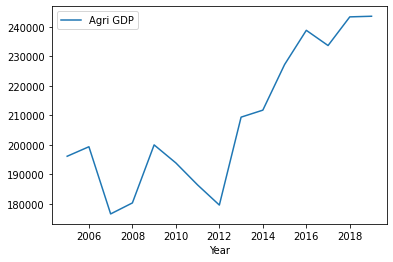

In [95]:
corn_general.plot(x= 'Year', y = 'Agri GDP')

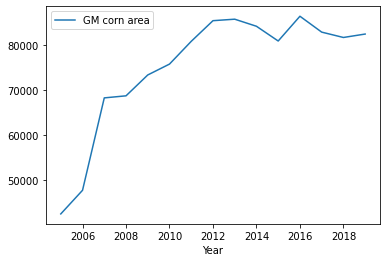

In [96]:
corn_general.plot(x= 'Year', y = 'GM corn area')

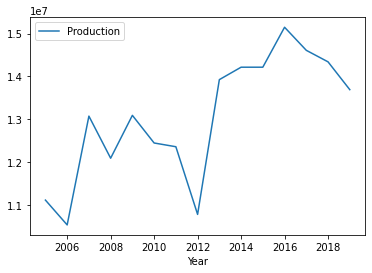

In [97]:
corn_general.plot(x= 'Year', y = 'Production')

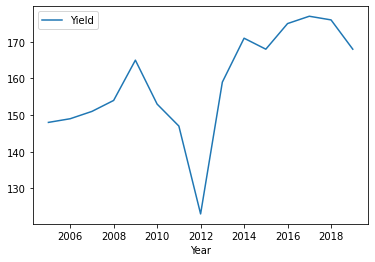

In [98]:
corn_general.plot(x= 'Year', y = 'Yield')

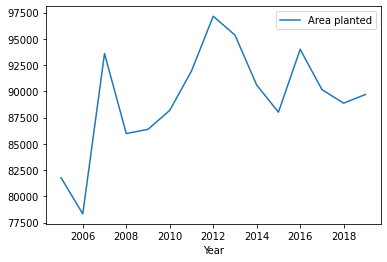

In [100]:
corn_general.plot(x= 'Year', y = 'Area planted')

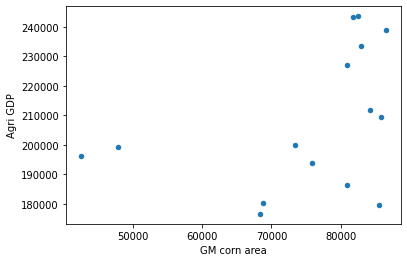

In [102]:
corn_general.plot.scatter(x= 'GM corn area', y = 'Agri GDP')

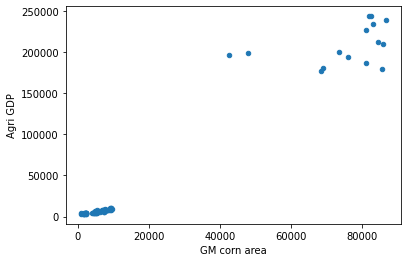

In [103]:
corn_table.plot.scatter(x='GM corn area', y ='Agri GDP')